<span style="color:#8DB6CD; font-size:30px">**Visualización Integrada de los datos**</span>
***


<span style="color:#FFB3A7; font-size:20px">**Índice**</span>
 
- [Datos temperatura](#datos-temperatura)
- [Datos de Gamma ray](#datos-de-gamma-ray)
- [Datos estructurales](#datos-estructurales)
- [Integración de datos](#integracion-de-datos)


### <a id="datos-temperatura"></a> <span style="color:#FFB3A7; font-size:20px"> **Datos de temperatura** </span>
***

En este notebook, usaremos el archivo `O_S45_Temperatura.txt` que cuenta con datos de profundidad y temperatura.


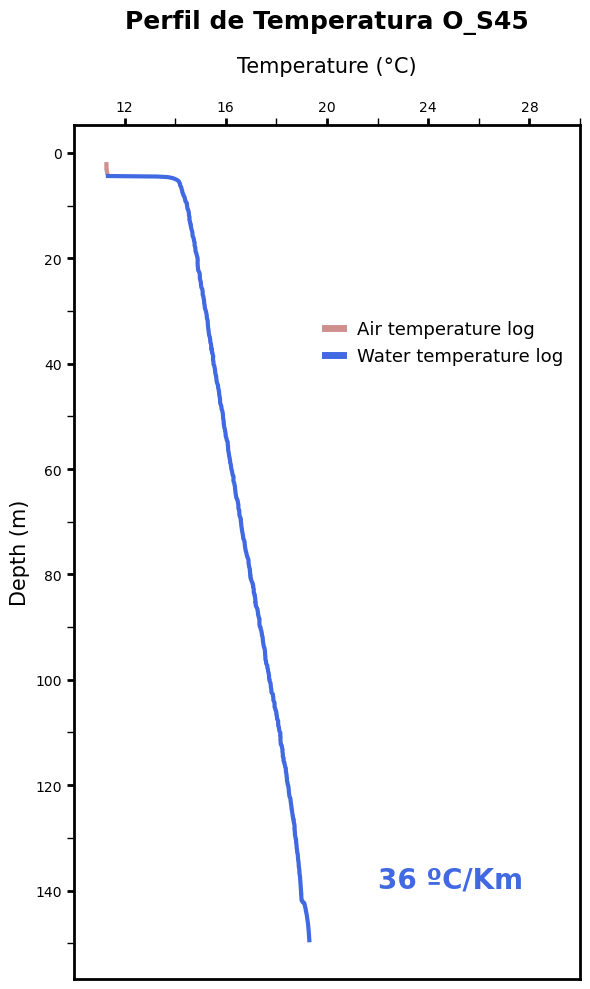

In [ ]:
# Importación de bibliotecas necesarias
import pandas as pd  # Biblioteca para manejo de datos en formato DataFrame
from scipy.stats import linregress  # Importa la función de regresión lineal de scipy
import matplotlib.pyplot as plt # Para crear gráficos
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator # Herramientas para personalizar los ticks de los ejes
from matplotlib.lines import Line2D  # Para crear líneas personalizadas en la leyenda

# Cargar datos de Gamma Ray desde un archivo de texto
data = pd.read_csv("datos_txt/O_S45_Temperatura.txt", delim_whitespace=True, encoding="utf-8") # Leer archivo con datos de Gamma Ray

data = data.iloc[1:].copy()  # Eliminar la primera fila de unidades 
data = data.apply(pd.to_numeric, errors='coerce') # Convertir los datos a numéricos (ignorando los errores)

# Definir la profundidad mínima del agua (profundidad desde la cual analizamos el gradiente térmico del agua)
profundidad_agua = 4.38

# Filtrar los datos para que solo se consideren profundidades mayores o iguales a 4.38 metros (agua)
df_filtrado = data[data["Depth"] >= profundidad_agua].copy()

# Calculamos el gradiente medio en el agua (ajuste lineal de la temperatura vs profundidad)
# Ajustamos una regresión lineal con los datos filtrados de agua
slope, intercept, r_value, p_value, std_err = linregress(df_filtrado["Depth"], df_filtrado["Temperature"])

# Convertir el gradiente de °C/m a °C/Km (gradiente térmico)
water_gradient = slope * 1000  # Convertir el gradiente a °C/Km 

# Calcular el gradiente térmico para cada punto de profundidad en el sondeo
# Usamos la diferencia entre las temperaturas consecutivas dividida por el intervalo de 0.05m
# Crear columna de gradiente térmico (NaN en la primera fila porque no tiene diferencia)
data["Gradient"] = (data["Temperature"].diff() / 0.05) * 1000 # Gradiente térmico en °C/Km

#  Filtrar los datos para obtener solo los registros del agua (profundidades mayores o iguales a 4.38 m)
df_agua = data[data["Depth"] >= profundidad_agua].copy()

# Filtrar los datos para obtener solo los registros del aire (profundidades menores a 4.38 m)
df_aire = data[data["Depth"] < profundidad_agua].copy()

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 10))  # Crear una figura de 6x10 pulgadas

# Graficar las curvas de temperatura para el aire y el agua

ax.plot(df_aire["Temperature"], df_aire["Depth"], # Graficar la temperatura del aire
                       color='#D08F8F', linewidth=3, label='Air temperature log') # Color y estilo de la línea para el aire

ax.plot(df_agua["Temperature"], df_agua["Depth"],  # Graficar la temperatura del agua
                       color='royalblue', linewidth=3, label='Water temperature log') # Color y estilo de la línea para el agua

# Configuración de los ejes X e Y
ax.set_xlabel('Temperature (°C)', fontsize=15, labelpad=20)  # Etiqueta del eje X (Temperatura) con mayor separación (Aumenta separación con labelpad)
ax.set_ylabel('Depth (m)', fontsize=15)  # Etiqueta del eje Y (Profundidad)

ax.set_xlim(10, 30)  # Rango del eje X para la temperatura (de 10°C a 30°C)
ax.invert_yaxis()  # Invertir el eje Y para que la profundidad aumente hacia abajo (convención geológica)

# Configuración de los ticks en los ejes X e Y
ax.xaxis.set_ticks_position("top") # Colocar los ticks del eje X en la parte superior
ax.xaxis.set_label_position("top")  # Colocar la etiqueta del eje X en la parte superior
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Establecer ticks mayores con valores enteros
ax.xaxis.set_major_locator(MultipleLocator(4))  # Establecer los ticks mayores cada 4 unidades en el eje X
ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # Configurar los ticks menores en el eje X

ax.yaxis.set_major_locator(MultipleLocator(20)) # Configurar los ticks mayores cada 20 metros en el eje Y
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # Configurar los ticks menores en el eje Y

# Hacer los ticks más gruesos y largos para mayor visibilidad
ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=10)  # Ticks principales más gruesos
ax.tick_params(axis='both', which='minor', width=1, length=5)   # Ticks menores más delgados

# Aumentar el grosor del borde del gráfico para mejorar la visualización
for spine in ax.spines.values(): # Iterar sobre todos los bordes (spines) del gráfico
    spine.set_linewidth(2)   # Aumentar el grosor de cada borde

# Agregar un título al gráfico
ax.set_title('Perfil de Temperatura O_S45', fontsize=18, fontweight='bold', pad=20) # Título con formato y margen

# Crear elementos personalizados para la leyenda (líneas con colores representando el aire y el agua)
legend_elements = [
    Line2D([0], [0], color='#D08F8F', lw=5, label='Air temperature log'),  # Línea gruesa y color para temperatura del aire
    Line2D([0], [0], color='royalblue', lw=5, label='Water temperature log')  # Línea gruesa y color para temperatura del agua
]

# Crear la leyenda usando los elementos personalizados y configurar su posición
legend = ax.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1, 0.7), fontsize=13, handlelength=1)

legend.get_frame().set_linewidth(0)  # Eliminar el contorno de la leyenda

# Agregar el texto en el gráfico con el valor del gradiente en agua
ax.text(0.6, 0.1, f'{water_gradient:.0f} ºC/Km', # Mostrar el gradiente en °C/Km
        transform=ax.transAxes, fontsize=20, color='royalblue', # Usar el sistema de coordenadas de la figura
        verticalalignment='bottom', horizontalalignment='left', fontweight='bold') # Alineación y estilo del texto

# Ajustar el diseño para que no haya solapamiento entre elementos
plt.tight_layout()

# Exportar la figura a archivos PNG y PDF con alta resolución
#plt.savefig(f"datos_png_pdf/O_S45_Temperatura.png", dpi=300)  # Guardar como PNG a 300 dpi
#plt.savefig(f"datos_png_pdf/O_S45_Temperatura.pdf", format='pdf') # Guardar como archivo PDF

# Mostrar la figura
plt.show()

### <a id="datos-de-gamma-ray"></a> <span style="color:#FFB3A7; font-size:20px"> **Datos de Gamma ray** </span>
***

En este notebook, usaremos el archivo `O_S45_Gammaray.txt` que cuenta con datos de profundidad y Gamma Ray.


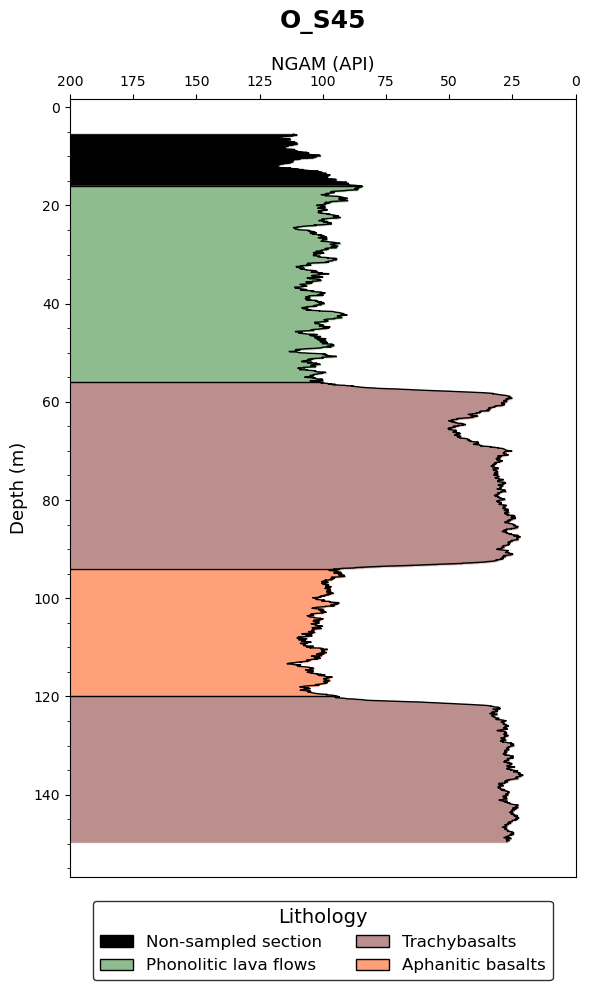

In [ ]:

# Importación de bibliotecas necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

# Cargar datos de Gamma Ray desde un archivo de texto txt
data = pd.read_csv("datos_txt/O_S45_Gammaray.txt", delim_whitespace=True, encoding="utf-8") # Leer archivo con datos de Gamma Ray
data = data.iloc[1:].copy()  # Eliminar la primera fila de unidades o encabezado no necesario para el análisis
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir los datos a numéricos (ignorando los errores)
data['NGAM'] = data['NGAM'].mask(data['NGAM'] < 0, np.nan)  # Reemplazar valores negativos en NGAM por NaN (valores no válidos)

# Cargar datos de Litología desde un archivo de texto
data_lito = pd.read_csv("datos_txt/O_S45_Litologia.txt", delim_whitespace=True, encoding="utf-8") # Leer archivo con datos de Litología
col_dict_data_lito = {"TopDepth": "Top", "BottomDepth": "Bottom", "LithoCode": "Lito"}  # Diccionario para renombrar columnas
data_lito = data_lito.iloc[1:].copy() # Eliminar la primera fila de encabezado
data_lito = data_lito.apply(pd.to_numeric, errors='ignore') # Convertir los datos de litología a numéricos
data_lito.rename(columns=col_dict_data_lito, inplace=True) # Renombrar columnas según el diccionario

# Interpolación y suavizado de los valores de NGAM
data["NGAM_interp"] = data["NGAM"].interpolate(method="linear") # Interpolación lineal para llenar los valores NaN en NGAM
data["NGAM_suavizado"] = data["NGAM_interp"].rolling(window=20, center=True).mean() # Suavizado de NGAM usando una ventana de 20 valores

# Diccionario que mapea los códigos de litología a sus nombres y colores correspondientes
litologias = {
    1: {'Nombre_litologia': 'Non-sampled section', 'Color': '#000000'},
    2: {'Nombre_litologia': 'Sands', 'Color': '#FFE4B5'},
    3: {'Nombre_litologia': 'Pumice', 'Color': '#FFE4E1'},
    4: {'Nombre_litologia': 'Phonolitic lava flows', 'Color': '#8FBC8F'},
    5: {'Nombre_litologia': 'Phonolitic mafic lava flows', 'Color': '#556B2F'},
    6: {'Nombre_litologia': 'Trachybasalts', 'Color': '#BC8F8F'},
    7: {'Nombre_litologia': 'Aphanitic basalts', 'Color': '#FFA07A'}
}

# Función para asignar un código de litología a cada profundidad
def asignar_litologia(profundidad):
    # Buscar en la base de datos de litología donde la profundidad está entre Top y Bottom
    fila = data_lito[(data_lito["Top"] <= profundidad) & (data_lito["Bottom"] > profundidad)]
    return fila["Lito"].values[0] if not fila.empty else np.nan # Retornar el código de litología si se encuentra

# Asignar litología y color a cada fila en `data` basada en la profundidad
data["Lito"] = data["Depth"].apply(asignar_litologia) # Asignar litología según la profundidad
data["Color_Lito"] = data["Lito"].map(lambda x: litologias.get(x, {'Color': '#FFFFFF'})['Color']) # Mapear color de litología

# crear el grafico NGAM y litología
fig, ax = plt.subplots(figsize=(6, 10)) # Crear una figura con dimensiones 6x10 pulgadas

# Graficar la curva de NGAM suavizada
ax.plot(data["NGAM_suavizado"], data["Depth"], color='black', linewidth=1, label='NGAM (API)')

# Rellenar el área izquierda de la curva de NGAM con colores según litología
for i in range(len(data) - 1): # Iterar sobre los datos
    if not np.isnan(data["Lito"].iloc[i]): # Verificar si hay litología asignada
        color = data["Color_Lito"].iloc[i] # Obtener el color asociado a la litología
        ax.fill_betweenx([data["Depth"].iloc[i], data["Depth"].iloc[i + 1]], # Dibujar el área entre los dos puntos de profundidad
                         data["NGAM_suavizado"].iloc[i], # Valor de NGAM en el primer punto
                         200,  # Límite superior del valor de NGAM (máximo en la escala de 0-200)
                         color=color, alpha=0.6) # Rellenar con color y opacidad 0.6

# Detectar cambios de litología y etiquetarlos
cambios_lito = data["Lito"].ne(data["Lito"].shift()).cumsum() # Detectar cambios en litología usando la diferencia y acumulando los cambios


# Dibujar líneas horizontales en cada cambio de litología siguiendo la curva NGAM
for lit_group, lit_data in data.groupby(cambios_lito): # Agrupar los datos por cada cambio de litología
    min_depth = lit_data["Depth"].min() # Obtener la profundidad mínima de cada grupo
    max_gamma = data[data["Depth"] == min_depth]["NGAM_suavizado"].iloc[0] # Obtener el valor de NGAM en la profundidad mínima

    if not np.isnan(max_gamma):  # Evita errores si hay valores NaN
        ax.plot([max_gamma, 200], [min_depth, min_depth], color='black', linestyle='-', linewidth=1) # Dibujar una línea horizontal


# Configurar de los ejes
ax.set_xlabel("NGAM (API)", fontsize=13)  # Etiqueta del eje X
ax.set_ylabel("Depth (m)", fontsize=13)  # Etiqueta del eje Y
ax.invert_yaxis()  # Invertir el eje Y para que la profundidad aumente hacia abajo
ax.xaxis.set_label_position("top") # Mover la etiqueta del eje X a la parte superior
ax.xaxis.set_ticks_position("top") # Mover los ticks del eje X a la parte superior
ax.set_xlim(200, 0)   # Invertir el eje X (NGAM de mayor a menor)
ax.yaxis.set_major_locator(MultipleLocator(20)) # Configurar los ticks mayores en el eje Y cada 20 metros
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # Configurar los ticks menores en el eje Y

# Crear la leyenda de litologías
# Crear objetos Patch para cada litología con su color respectivo
lit_patches = [Patch(facecolor=lit['Color'], edgecolor='black', label=lit['Nombre_litologia']) 
               for lit_code, lit in litologias.items() if lit_code in data["Lito"].unique()]

# Crear la leyenda y configurarla
legend = plt.legend(handles=lit_patches, loc='upper center', bbox_to_anchor=(0.5, -0.02), 
                    ncol=2, fontsize=12, title="Lithology", title_fontsize=14)
legend.get_frame().set_edgecolor('black') # Establecer borde negro en el marco de la leyenda

# Agregar título al gráfico
ax.set_title('O_S45', fontsize=18, fontweight='bold', pad=20) # Título con formato

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Guardar la figura en formato PNG y PDF
#plt.savefig(f"datos_png_pdf/O_S45_Gammaray.png", dpi=300, bbox_inches="tight") # Guardar como PNG con alta resolución
#plt.savefig(f"datos_png_pdf/O_S45_Gammaray.pdf", format="pdf", bbox_inches="tight") # Guardar como PDF

# Mostrar la figura generada
plt.show()

### <a id="datos-estructurales"></a> <span style="color:#FFB3A7; font-size:20px"> **Datos estructurales** </span>
***

En este notebook, usaremos el archivo `O_S45_Fracturas.txt` que cuenta con datos de profundidad, Dip y Azimuth.

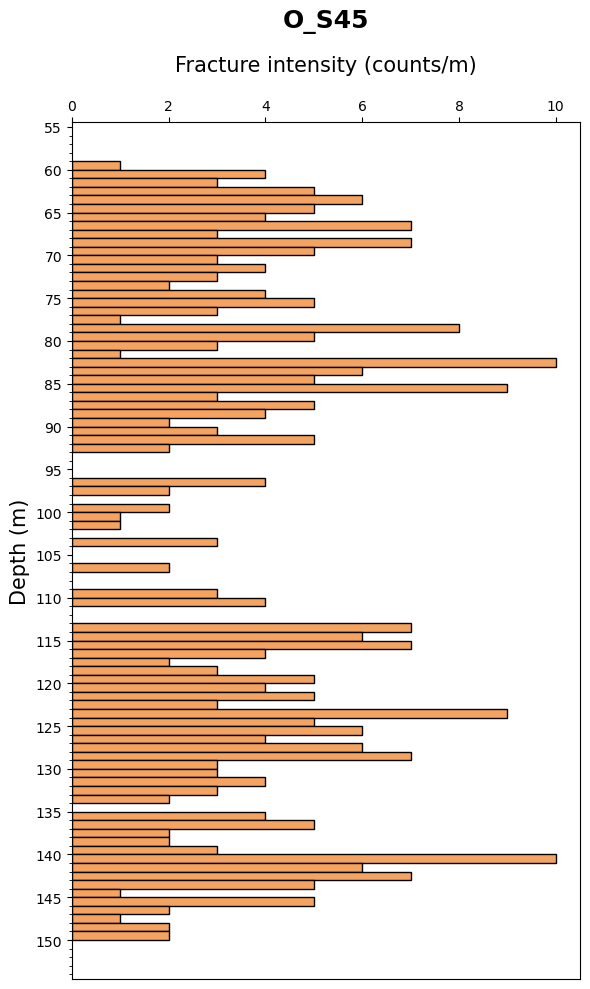

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator
import mplstereonet
import seaborn as sns

# Cargar datos desde un archivo de texto TXT
data = pd.read_csv("datos_txt/O_S45_Fracturas.txt", delim_whitespace=True, encoding="utf-8") # Leer archivo de fracturas

data = data.iloc[1:].copy()  # Eliminar la primera fila de unidades
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir las columnas del DataFrame a valores numéricos 

# Aplicar corrección al azimut para obtener el Strike de las fracturas
# El Strike se calcula restando 90° al valor del azimut para hacerlo más compatible con la proyección polar
data["Strike"] = (data["Azimuth"] - 90) % 360 

# Redondear la columna de profundidad a metros enteros más cercano
data["Depth_rounded"] = data["Depth"].astype(int)

# Contar cuántas fracturas hay en cada metro de profundidad
fracture_counts = data["Depth_rounded"].value_counts().sort_index()

# Crear un nuevo DataFrame con la intensidad de fracturas por metro de profundidad
# La "intensidad de fracturas" es simplemente la cantidad de fracturas por cada profundidad
df_fracture_intensity = pd.DataFrame({
    "Depth": fracture_counts.index, # Profundidad (índice de fracture_counts)
    "Fracture_Intensity": fracture_counts.values  # Intensidad de fracturas (valores de fracture_counts)
})
# Ordenar el DataFrame por la profundidad 
df_fracture_intensity.sort_values("Depth", ascending=True, inplace=True)

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 10)) # Crear una figura de tamaño 6x10 pulgadas

# Graficar la intensidad de fracturas usando barras horizontales
ax.barh(
    df_fracture_intensity["Depth"],               # Eje Y (Profundidad)
    df_fracture_intensity["Fracture_Intensity"],  # Eje X (Cantidad de fracturas por metro)
    height=1,                                     # Altura de la barra (cada barra corresponde a 1 metro)
    color="sandybrown",                           # Color de las barras (marrón claro)
    edgecolor="black",                            # Color del borde de las barras (negro para mejor visibilidad)
    align="edge"                                  # Asegura que las barras comiencen en cada metro
)

# Configuración de los ejes
ax.set_xlabel('Fracture intensity (counts/m)', fontsize=15, labelpad=20) # Etiqueta del eje X
ax.set_ylabel('Depth (m)', fontsize=15) # Etiqueta del eje Y
ax.invert_yaxis()  # Invertir eje Y para que la profundidad vaya hacia abajo
ax.xaxis.set_ticks_position("top") # Mover los ticks del eje X a la parte superior
ax.xaxis.set_label_position("top") # Mover la etiqueta del eje X a la parte superior
ax.tick_params(axis='both', which='major', labelsize=10) # Ajustar tamaño de los ticks principales
ax.tick_params(axis='both', which='minor', labelsize=8) # Ajustar tamaño de los ticks menores
ax.yaxis.set_major_locator(MultipleLocator(5)) # Ubicar los ticks mayores del eje Y cada 5 metros
ax.yaxis.set_minor_locator(AutoMinorLocator(5)) # Ubicar los ticks menores automáticamente

# Agregar título al gráfico
ax.set_title('O_S45', fontsize=18, fontweight='bold', pad=20) # Título del gráfico con formato

# Ajustar el diseño para evitar que se superpongan elementos
plt.tight_layout()

# Guardar la figura en formato PNG o PDF (comentado por ahora)
plt.savefig("datos_png_pdf/O_S45_Fracturas.png", dpi=300)
plt.savefig("datos_png_pdf/O_S45_Fracturas.pdf", format='pdf')

# Mostrar el gráfico
plt.show()


### <a id="intergracion-de-datos"></a> <span style="color:#FFB3A7; font-size:20px"> **Integración de datos** </span>
***


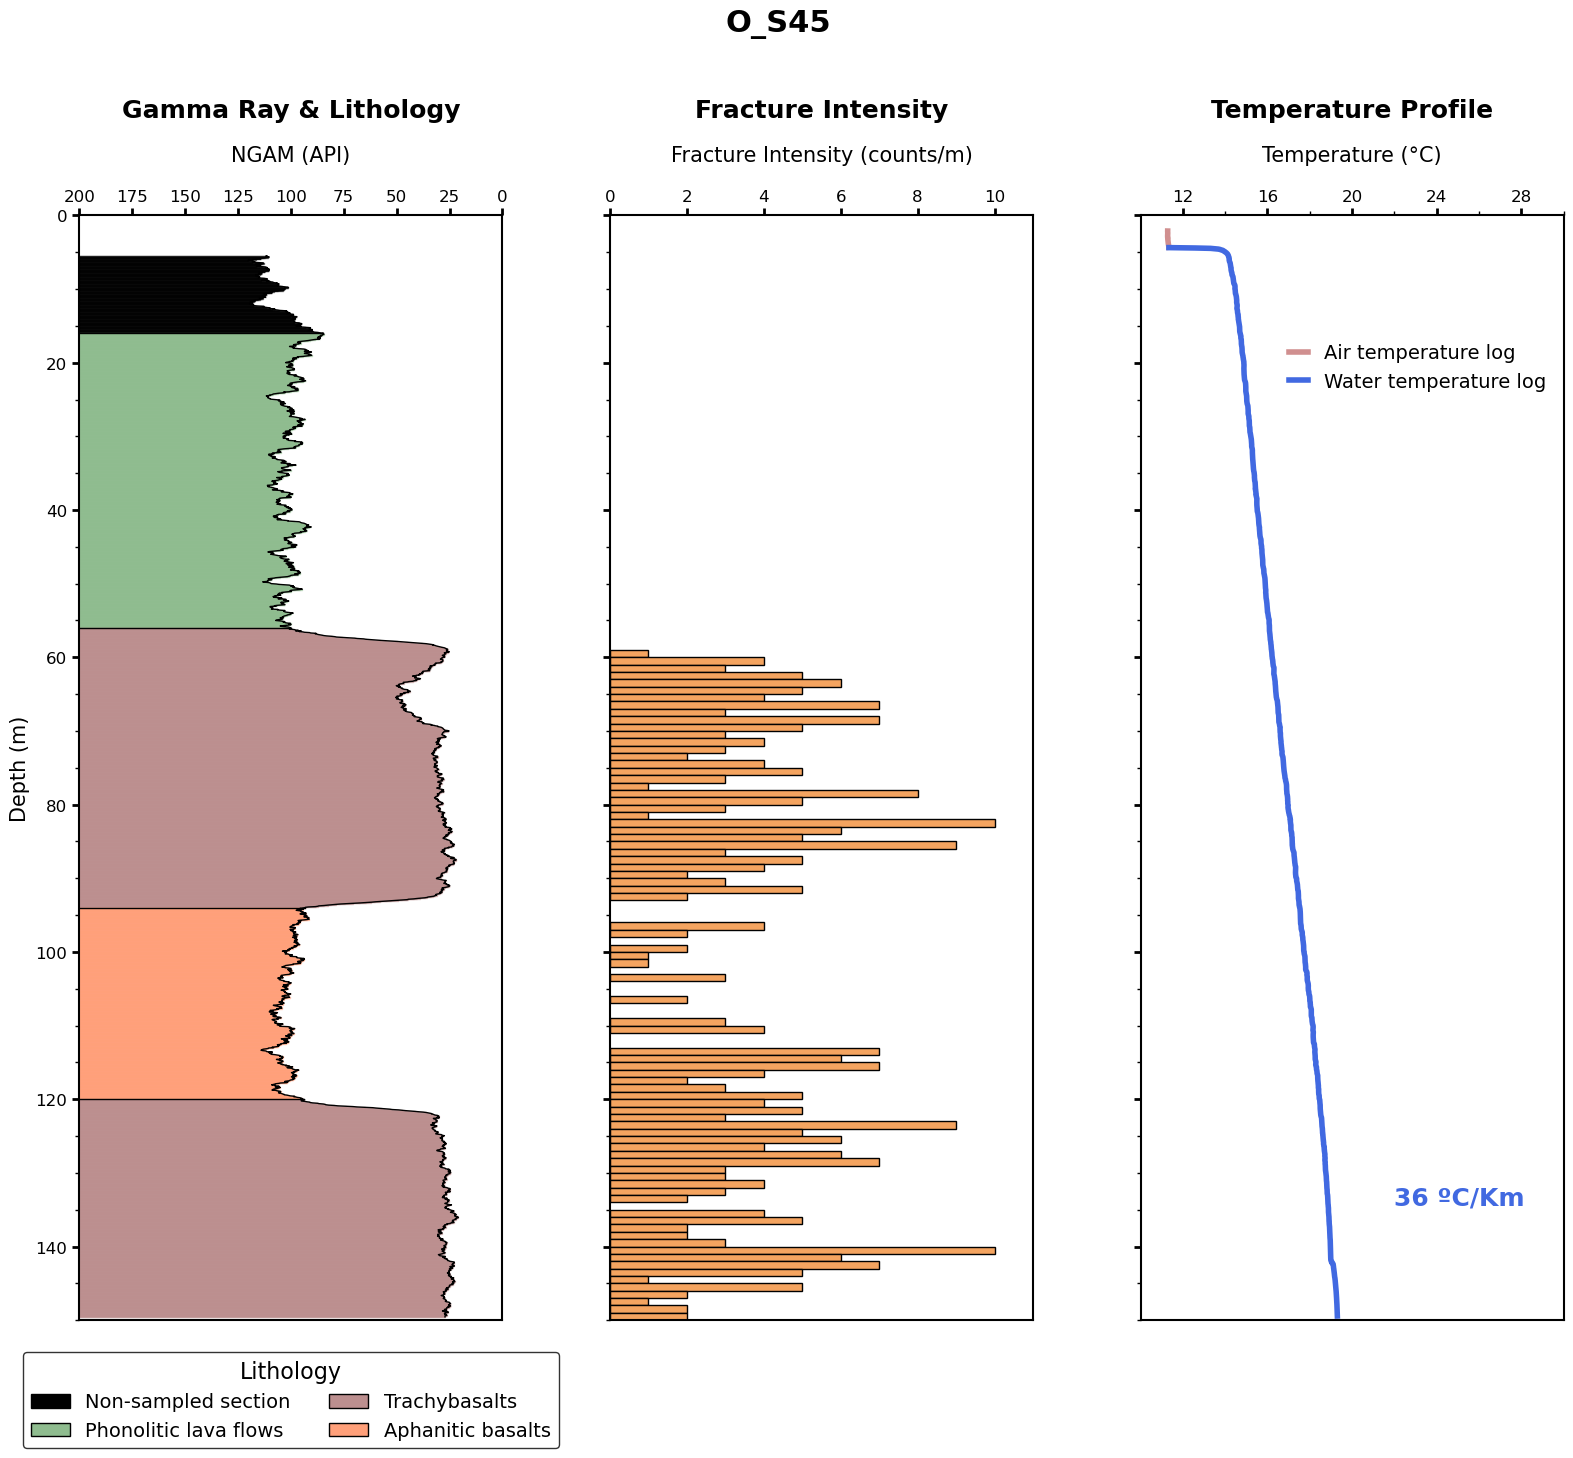

In [ ]:
# Importación de librerías necesarias para el análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Cargar y limpiar los datos de Gamma Ray
data_gamma = pd.read_csv("datos_txt/O_S45_Gammaray.txt", delim_whitespace=True, encoding="utf-8").iloc[1:]
data_gamma = data_gamma.apply(pd.to_numeric, errors='ignore')
data_gamma['NGAM'] = data_gamma['NGAM'].mask(data_gamma['NGAM'] < 0, np.nan) # Reemplazar valores negativos con NaN

## Cargar y preparar los datos de Litología
data_lito = pd.read_csv("datos_txt/O_S45_Litologia.txt", delim_whitespace=True, encoding="utf-8").iloc[1:]
data_lito = data_lito.apply(pd.to_numeric, errors='ignore')
data_lito.rename(columns={"TopDepth": "Top", "BottomDepth": "Bottom", "LithoCode": "Lito"}, inplace=True)

# Interpolación y suavizado de los datos de Gamma Ray 
data_gamma["NGAM_interp"] = data_gamma["NGAM"].interpolate(method="linear") # Interpolación lineal
data_gamma["NGAM_suavizado"] = data_gamma["NGAM_interp"].rolling(window=20, center=True).mean() # Suavizado con ventana de 20 puntos

# Diccionario de litologías con colores asignados
litologias = {
    1: {'Nombre_litologia': 'Non-sampled section', 'Color': '#000000'},
    2: {'Nombre_litologia': 'Sands', 'Color': '#FFE4B5'},
    3: {'Nombre_litologia': 'Pumice', 'Color': '#FFE4E1'},
    4: {'Nombre_litologia': 'Phonolitic lava flows', 'Color': '#8FBC8F'},
    5: {'Nombre_litologia': 'Phonolitic mafic lava flows', 'Color': '#556B2F'},
    6: {'Nombre_litologia': 'Trachybasalts', 'Color': '#BC8F8F'},
    7: {'Nombre_litologia': 'Aphanitic basalts', 'Color': '#FFA07A'}
}

# Función para asignar litología según la profundidad
def asignar_litologia(profundidad):
    fila = data_lito[(data_lito["Top"] <= profundidad) & (data_lito["Bottom"] > profundidad)]
    return fila["Lito"].values[0] if not fila.empty else np.nan

# Aplicar la asignación de litología a los datos de Gamma Ray
data_gamma["Lito"] = data_gamma["Depth"].apply(asignar_litologia)
data_gamma["Color_Lito"] = data_gamma["Lito"].map(lambda x: litologias.get(x, {'Color': '#FFFFFF'})['Color'])

## Cargar y procesar los datos de Fracturas
data_frac = pd.read_csv("datos_txt/O_S45_Fracturas.txt", delim_whitespace=True, encoding="utf-8").iloc[1:]
data_frac = data_frac.apply(pd.to_numeric, errors='ignore')
data_frac["Strike"] = (data_frac["Azimuth"] - 90) % 360  # Calcular el azimut de las fracturas
data_frac["Depth_rounded"] = data_frac["Depth"].astype(int) # Redondear la profundidad
fracture_counts = data_frac["Depth_rounded"].value_counts().sort_index() # Contar fracturas por profundidad
df_fracture_intensity = pd.DataFrame({"Depth": fracture_counts.index, "Fracture_Intensity": fracture_counts.values})

## Cargar y procesar los datos de Temperatura
data_temp = pd.read_csv("datos_txt/O_S45_Temperatura.txt", delim_whitespace=True, encoding="utf-8").iloc[1:]
data_temp = data_temp.apply(pd.to_numeric, errors='coerce') # Convertir datos a numéricos, manejar errores
profundidad_agua = 4.38
df_filtrado = data_temp[data_temp["Depth"] >= profundidad_agua]  # Filtrar datos de agua
slope, intercept, _, _, _ = linregress(df_filtrado["Depth"], df_filtrado["Temperature"]) # Ajuste lineal
water_gradient = slope * 1000  # Calcular el gradiente de temperatura y convertir a °C/Km 
data_temp["Gradient"] = (data_temp["Temperature"].diff() / 0.05) * 1000  # Calcular el gradiente de temperatura local

df_agua = data_temp[data_temp["Depth"] >= profundidad_agua]
df_aire = data_temp[data_temp["Depth"] < profundidad_agua]

### Crear figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 15), sharey=True)
ax1, ax2, ax3 = axes # Asignar ejes a cada subgráfico

## Gráfico 1: Curva de Gamma Ray con litología
ax1.plot(data_gamma["NGAM_suavizado"], data_gamma["Depth"], color='black', linewidth=1)
ax1.set_xlabel("NGAM (API)", fontsize=15, labelpad=20)
ax1.set_xlim(200, 0)
ax1.set_title("Gamma Ray & Lithology", fontsize=18, fontweight='bold', pad=20)
ax1.set_ylim(0, 150)
ax1.invert_yaxis() # Invertir el eje Y (profundidad aumenta hacia abajo)
ax1.set_ylabel('Depth (m)', fontsize=15)
ax1.yaxis.set_major_locator(MultipleLocator(20)) # Ticks principales en el eje Y
ax1.yaxis.set_minor_locator(AutoMinorLocator(4)) # Ticks menores en el eje Y

# Rellenar la litología en el gráfico de Gamma Ray, de izquierda a derecha hasta la curva de NGAM
depths = data_gamma["Depth"].values
for i in range(len(data_gamma) - 1):
    if not np.isnan(data_gamma["Lito"].iloc[i]):
        color = data_gamma["Color_Lito"].iloc[i]
        ax1.fill_betweenx([depths[i], depths[i + 1]], 200, data_gamma["NGAM_suavizado"].iloc[i], 
                          color=color, alpha=0.5)

# Detectar y marcar cambios de litología
cambios_lito = data_gamma["Lito"].ne(data_gamma["Lito"].shift()).cumsum()
for lit_group, lit_data in data_gamma.groupby(cambios_lito):
    min_depth = lit_data["Depth"].min()
    max_gamma = data_gamma[data_gamma["Depth"] == min_depth]["NGAM_suavizado"].iloc[0]

    if not np.isnan(max_gamma):  # Evita errores si hay valores NaN
        ax1.plot([max_gamma, 200], [min_depth, min_depth], color='black', linestyle='-', linewidth=1)

# Crear la leyenda de litología dentro del grafico
#legend_elements = [Patch(facecolor=litologias[key]['Color'], edgecolor='black', label=litologias[key]['Nombre_litologia']) for key in litologias.keys()]
#ax1.legend(handles=legend_elements, loc='lower left', fontsize=14)

# Crear la leyenda de litologías  fuera del gráfico 1
lit_patches = [Patch(facecolor=lit['Color'], edgecolor='black', label=lit['Nombre_litologia']) 
               for lit_code, lit in litologias.items() if lit_code in data_gamma["Lito"].unique()]
legend = ax1.legend(handles=lit_patches, loc='upper center', bbox_to_anchor=(0.5, -0.02), 
                    ncol=2, fontsize=14, title="Lithology", title_fontsize=16)
legend.get_frame().set_edgecolor('black')  # Añadir contorno al marco de la leyenda


# Mover el eje X a la parte superior del gráfico
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')

## Gráfico 2: Intensidad de fracturas
ax2.barh(df_fracture_intensity["Depth"], df_fracture_intensity["Fracture_Intensity"],
         height=1, color="sandybrown", edgecolor="black", align="edge", linewidth=1)
ax2.set_xlabel("Fracture Intensity (counts/m)", fontsize=15, labelpad=20)
ax2.set_xlim(0, df_fracture_intensity["Fracture_Intensity"].max() + 1)
ax2.set_title("Fracture Intensity", fontsize=18, fontweight='bold', pad= 20)

# Mover el eje X a la parte superior
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')

## Gráfico 3: Perfil de temperatura
ax3.plot(df_aire["Temperature"], df_aire["Depth"], color='#D08F8F', linewidth=4, label='Air temperature log')
ax3.plot(df_agua["Temperature"], df_agua["Depth"], color='royalblue', linewidth=4, label='Water temperature log')
ax3.set_xlabel("Temperature (°C)", fontsize=15, labelpad=20)
ax3.set_xlim(10, 30)
ax3.set_title("Temperature Profile", fontsize=18, fontweight='bold', pad= 20)
legend = ax3.legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=14, handlelength=1)
legend.get_frame().set_linewidth(0)  # Eliminar el contorno de la leyenda

# Mostrar el gradiente de agua en el gráfico
ax3.text(0.6, 0.1, f'{water_gradient:.0f} ºC/Km', transform=ax3.transAxes, fontsize=18, color='royalblue',
         verticalalignment='bottom', horizontalalignment='left', fontweight='bold')

# Mover el eje X a la parte superior
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.xaxis.set_major_locator(MultipleLocator(4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))


# Título encima de todos los gráficos con margen extra
fig.suptitle('O_S45', fontsize=22, fontweight='bold', ha='center', y=0.97)  # Ajusta 'y' para más espacio

# Hacer más grueso el borde del gráfico para todos los subgráficos
for ax in [ax1, ax2, ax3]:  
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Grosor del marco del gráfico

# Hacer más grueso y largo los ticks
for ax in axes:  # Iterar sobre todos los ejes
    ax.tick_params(axis='both', which='major', width=2, length=5, labelsize=12)  # Ticks principales
    ax.tick_params(axis='both', which='minor', width=1, length=3)  # Ticks menores


# Ajustar generales para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Mantiene márgenes sin afectar título 

# Guardar el gráfico como imágenes PNG y PDF
#plt.savefig("datos_png_pdf/O_S45_Combined.png", dpi=300)
#plt.savefig("datos_png_pdf/O_S45_Combined.pdf", format='pdf')

# Mostrar el gráfico
plt.show()